In [1]:
%load_ext autoreload

In [2]:
%autoreload

In [9]:
import numpy as np
from keras import utils
import matplotlib.pyplot as plt

from converter import Mc2RealConverter

In [4]:
mc2real = Mc2RealConverter()

2023-06-29 22:30:43.805309: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-29 22:30:43.818942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-29 22:30:43.819074: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
dataset = utils.image_dataset_from_directory(
    directory='sample_images',
    image_size=(256, 256),
    labels=None,
    batch_size=1,
)

Found 10405 files belonging to 1 classes.


2023-06-29 22:30:46.388801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10405]
	 [[{{node Placeholder/_0}}]]
2023-06-29 22:30:46.389015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10405]
	 [[{{node Placeholder/_0}}]]


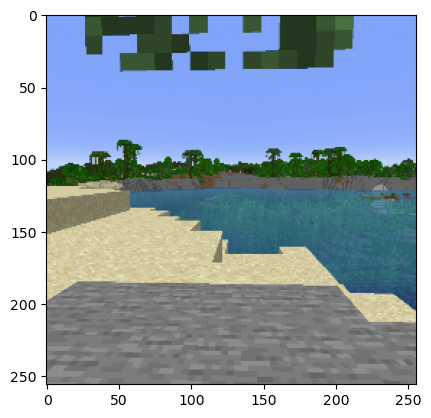

In [6]:
mc_image = next(iter(dataset))[0].numpy() / 255
plt.imshow(mc_image)

2023-06-29 22:33:08.794221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [1,256,256,25]
	 [[{{node Placeholder/_1}}]]


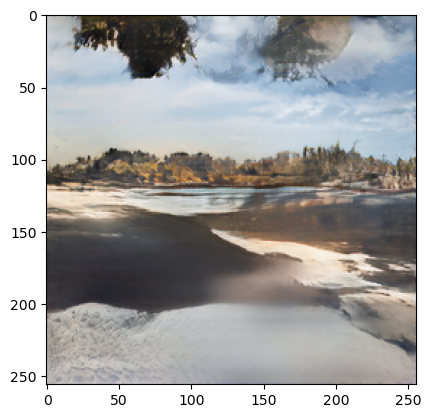

In [14]:
%autoreload
real_image = mc2real(mc_image)
plt.imshow(real_image)

In [ ]:
m1, m2, m3 = mc2real.get_last_masks()
masks = np.concatenate([m1, m2, m3], axis=1)
plt.imshow(masks)